In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Create and play with the properties of a quantum object

In [16]:
# Create a random operator as a 2x2 square matrix
Operator1 = Qobj([[1, 2], [2, 4]])
print(Operator1)

# Create a random state as a 2 vector
State1 = Qobj([[1], [2]])
print(State1)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 2.]
 [2. 4.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]]


In [24]:
# Generate some useful operators

H = Qobj([[1, 2, 3, 4], [1, 2, 3, 4],[1, 2, 3, 4],[1, 2, 3, 4]])
e, s = H.groundstate()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip\core\qobj.py:1626: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


In [25]:
print(e, s)

0j Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.98198051]
 [-0.10910895]
 [-0.10910895]
 [-0.10910895]]


In [216]:
#   Tensor notation
g = basis(2, 0)     # Ground state is (1, 0), basis(2,0) means a "2" dim vector with 1 being at the "0"th index
n = basis(2, 1)

a = destroy(2)      # Make the annihilation and excitation operators
sig_p = create(2)

e = (sig_p*g)       # Act excitation on ground
n_1 = (a*n)         # Act annihilation on n photons


print('atom g', g.full())
print('light n', n.full())
print('atom e', e.full())
print('light n-1', n_1.full())

e_n_1 = tensor(e, n_1)  # Encode by making this |e, n-1>


# We can achieve the same e_n_1 as above directly using tensors:
# instead of applying sig_p on g and a on n directly, I make sig_p X a and g X n
# (where X is tensor product) and apply one to the other
g_n = tensor(g, n)
e_n_1_tens = tensor(sig_p, a)*g_n


# Comparing the results to find they are the same
print('tens', e_n_1_tens.full())
print('no tens', e_n_1.full())

atom g [[1.+0.j]
 [0.+0.j]]
light n [[0.+0.j]
 [1.+0.j]]
atom e [[0.+0.j]
 [1.+0.j]]
light n-1 [[1.+0.j]
 [0.+0.j]]
tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]
no tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]


In [219]:
# Making the hamiltonian

# N = number of photons, thus number of "possible" atom states, but of course only
# two is accessible (ground and n), and we do not allow further excitation. Thus
# still work in 2 dimensions, but N is used for scaling?
N = 10
a = destroy(2)
a_dag = a.dag()
sig_p = create(2)
sig_m = destroy(2)
sigma_z = tensor(sigmaz(), qeye(2)) # making sigmaz a tensor that only applies on the atom, not light
                                  # because qeye is the identity matrix, and in this program:
                                  # (A X B)(gXn) --> Ag X Bn if A and B applies on g and n only, respectively
Count_op = tensor(qeye(2), a_dag*a)

wa = 1 # atom frequency
wc = 2 # photon frequency
Omega = 1 # Rabi oscillation frequency


H_JC = wa/2 * sigma_z + wc*Count_op + Omega/2 * (tensor(sig_p, a) + tensor(sig_m, a_dag))

print(H_JC.eigenstates())
print(H_JC.eigenenergies())


(array([-0.80277564,  0.5       ,  1.5       ,  2.80277564]), array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[ 0.        ]
        [-0.28978415]
        [ 0.95709203]
        [ 0.        ]]                                                             ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[1.]
        [0.]
        [0.]
        [0.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.]
        [0.]
        [0.]
        [1.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.        ]
        [0.95709203]
        [0.28978415]
        [0.        ]]                                           

In [165]:
print(Count_op * g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [10.]
 [ 0.]
 [ 0.]]


In [93]:
sig = tensor(sigmaz(), qeye(2))
print(e_n_1)

print(sig*e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [217]:
print(g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [218]:
print(e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


Making N photon states (ofc only 2 is accessible)

In [272]:
N = 11 # number of photon states (number of photons + 1(no photon state) )
g = basis(2, 0)
n = basis(N, N-1)

e = basis(2, 1)
n_1 = basis(N, N-2)

g_n = tensor(g, n)
e_n_1 = tensor(e, n_1)


sigma_z = tensor(sigmaz(), qeye(N))
a = tensor(qeye(2), destroy(N))
a_dag = a.dag()
sig_p = tensor(create(2), qeye(N))
sig_m = sig_p.dag()

int_excitation = tensor(create(2), destroy(N))
int_deexcitation = tensor(destroy(2), create(N))


print('-------------- |e,n-1> ----------------')
print('Original state : ')
print(e_n_1)
print('acted on state :')
print((a_dag*a)*e_n_1)


print('-------------- |g,n> ------------------')
print(sig_m*g_n)
print((a_dag*a)*g_n)
print(n)

-------------- |e,n-1> ----------------
Original state : 
Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
acted on state :
Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [9.]
 [0.]]
-------------- |g,n> ------------------
Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [10.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 

In [273]:
wa = 1
wc = 2
Omega = 1
H_JC = wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation)

print(H_JC.eigenstates())
print(g_n)
print(e_n_1)

(array([-0.58113883,  0.5       ,  1.3416876 ,  2.58113883,  3.26794919,
        4.6583124 ,  5.19722436,  6.73205081,  7.12917131,  8.80277564,
        9.06350833, 10.87082869, 11.        , 12.93649167, 12.93844719,
       14.87867966, 15.        , 16.82055053, 17.06155281, 19.12132034,
       19.5       , 21.17944947]), array([Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
       Qobj data =
       [[ 0.        ]
        [ 0.16018224]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [-0.98708746]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]
        [ 0.        ]]                                                               ,
       Quantum object:

In [274]:
print((H_JC * g_n))
print((H_JC * e_n_1))

Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [20.5       ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.58113883]
 [ 0.        ]]
Quantum object: dims=[[2, 11], [1, 1]], shape=(22, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.58113883]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [17.5       ]
 [ 0.        ]]


In [263]:
-1/2 + 2*8

15.5

In [286]:
c1 = np.cos(np.arctan2(Omega/2*np.sqrt(N-1), wa-wc)/2)
c2 = np.sin(np.arctan2(Omega/2*np.sqrt(N-1), wa-wc)/2)

In [287]:
print(c1, c2)

0.4824300551246528 0.8759344963594163


In [333]:
state = c1*g_n + c2*e_n_1
print(np.real(state.full()))

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Qobj'

In [467]:
N = 2 # number of photon states (number of photons + 1(no photon state) )

g = basis(2, 0)
n = basis(N, N-1)

e = basis(2, 1)
n_1 = basis(N, N-2)

g_n = tensor(g, n)
e_n_1 = tensor(e, n_1)

def H_JC(d):
    sigma_z = tensor(sigmaz(), qeye(N))
    a = tensor(qeye(2), destroy(N))
    a_dag = tensor(qeye(2), create(N))
    sig_p = tensor(create(2), qeye(N))
    sig_m = sig_p.dag()

    int_excitation = tensor(create(2), destroy(N))
    int_deexcitation = tensor(destroy(2), create(N))
    wc = 1
    wa = wc+d
    Omega = 1
    hjc = wa/(2) * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation)
    return hjc

print(g_n, e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]] Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


In [468]:
H_JC(0).eigenstates()[1][0]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [-0.22975292]
 [ 0.97324899]
 [ 0.        ]]

In [470]:
ite = 10000

d = np.arange(-5, 5, 0.3)
e_d = []
e_c1 = []
e_c1_QUTIP = []
for i in range (20*3):
    c1 = np.arange(0, 1, 1/ite)
    for j in range (ite):
        state = c1[j]*g_n + np.sqrt(1 - c1[j]**2)*e_n_1
        H_state = H_JC(d[i]) * state
        # print(H_state, state)
        quotient = np.real(H_state.full())/np.real(state.full())
        if np.abs(quotient[1] - quotient [2]) < 0.01:
            print(i)
            e_c1.append(c1[j])
            e_c1_QUTIP.append(H_JC(d[i]).eigenstates()[1][0].full()[1])
            e_d.append(d[i])
            break

C:\Users\USER\AppData\Local\Temp\ipykernel_27640\166055463.py:13: RuntimeWarning: divide by zero encountered in divide
  quotient = np.real(H_state.full())/np.real(state.full())
C:\Users\USER\AppData\Local\Temp\ipykernel_27640\166055463.py:13: RuntimeWarning: invalid value encountered in divide
  quotient = np.real(H_state.full())/np.real(state.full())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
27
28
30
31


IndexError: index 34 is out of bounds for axis 0 with size 34

In [370]:
print(len(e_d))

0


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


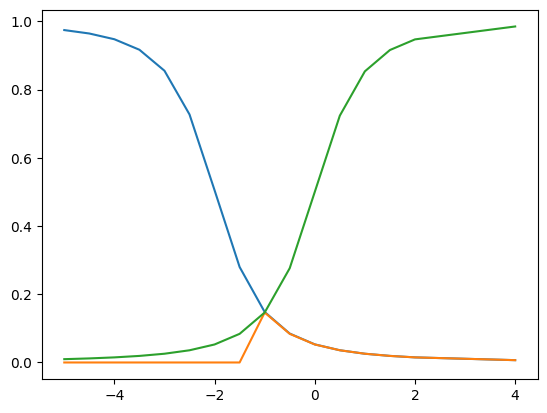

In [466]:
Omega = 10
# plt.plot(e_d, np.array(e_c1)**2)
plt.plot(e_d, (1-np.array(e_c1)**2))
plt.plot(e_d, np.array(e_c1_QUTIP)**2)
plt.plot(e_d, np.cos(np.arctan2(1*np.sqrt(N-1), e_d)/2)**2)
# plt.plot(e_d, np.sin(np.arctan2(1*np.sqrt(N-1), e_d)/2)**2)

In [411]:
t = np.arange(0, 10, 0.01)
results = sesolve(H_JC(0), psi0 = g_n, tlist = t)

(0.0, 1.0)

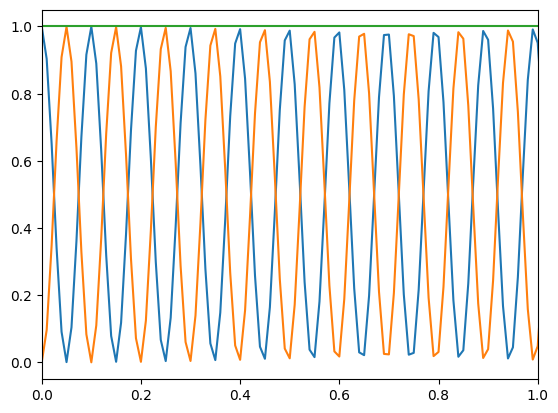

In [415]:
state_t = results.states
c1_sq = []
c2_sq = []
for i in range(len(state_t)):
    # print(state_t[i].full()[10])
    c1_sq.append(np.abs(state_t[i].full()[10])[0]**2)
    c2_sq.append(np.abs(state_t[i].full()[20])[0]**2)
plt.plot(t, c1_sq)
plt.plot(t, c2_sq)
plt.plot(t, np.array(c1_sq) + np.array(c2_sq))
plt.xlabel('Time per Omega')
plt.ylabel('Probability')
plt.legend(('g, n-1', 'e, n', 'Combined'))
plt.xlim(0, 1)